<a href="https://colab.research.google.com/github/nayeemhasan100/Nayeem_Hasan_23512766/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 136.1 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found exist

In [2]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: 6a4321cf714648cd91932e5f5cd382bd.d3aNe0j6YGG5nPJv8tNtRYVR


## 📦 Setup and Configuration
Import required packages and setup environment.

In [3]:
!pip install pyinputplus
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=474d62819a0787c6e2dcd0e1f895f135a234d5d4a922069118007f7349379656
  Stored in directory: /root/.cache/pip/wheels/85/81/c1/325c8199c5c4de8a0b9af900ff9cd8bd69853e3d9419493512
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16225 sha256=66b0d5b6cd2787dcfc35665fcae39cc43c7c1e9ed4d5e9a197f69bedb252e22c
  Stored in directory: /root/.cache/pip/wheels/09/de/18/4dd2be0dbdf31870c6f0abde43b0de197b1c095655ad7da5c2
  Created wheel for stdiomask: filename=stdiomask

## 🌤️ Weather Data Functions

In [4]:
# Define get_weather_data() function here
import fetch_my_weather
from typing import Union, Dict, Any

def get_weather_data(location: str = "", forecast_days: int = 5) -> Union[Dict[str, Any], str]:
    """
    Retrieve weather data for a specified location using fetch-my-weather.

    Args:
        location (str): City, coordinates, or location string. If empty, uses IP-based location.
        forecast_days (int): Number of days to forecast (1–5). Will try to use view_options accordingly.

    Returns:
        dict | str: Weather data (dict) or error message (str).
    """
    try:
        # Get full JSON / Pydantic model
        weather = fetch_my_weather.get_weather(location=location, units="m", format="json")
    except Exception as e:
        return f"Error retrieving weather: {e}"

    # In case of error, fetch-my-weather might return a string
    if isinstance(weather, str) and weather.startswith("Error:"):
        return weather

    data = {}
    if weather.nearest_area and len(weather.nearest_area) > 0:
        area = weather.nearest_area[0]
        data["location"] = area.areaName[0].value
        data["country"] = area.country[0].value
    else:
        data["location"] = location
        data["country"] = None

    # Current conditions
    if weather.current_condition and len(weather.current_condition) > 0:
        cur = weather.current_condition[0]
        data["current"] = {
            "temperature_C": cur.temp_C,
            "temperature_F": cur.temp_F,
            "weather_desc": cur.weatherDesc[0].value if cur.weatherDesc else None,
            "humidity": cur.humidity,
            "wind_speed_kmph": cur.windspeedKmph,
            "wind_dir": cur.winddir16Point,
        }
    else:
        data["current"] = {}

    # Forecast: weather.weather is a list of Daily forecasts
    forecasts = []
    for day in weather.weather[:forecast_days]:
        forecasts.append({
            "date": day.date,
            "maxtempC": day.maxtempC,
            "mintempC": day.mintempC,
            "avgtempC": day.avgtempC,
            "sunrise": day.astronomy[0].sunrise if day.astronomy else None,
            "sunset": day.astronomy[0].sunset if day.astronomy else None,
        })
    data["forecast"] = forecasts

    return data


## 📊 Visualisation Functions

In [11]:
import matplotlib.pyplot as plt
from typing import Dict, Any, Union

def create_temperature_visualisation(weather_data: Dict[str, Any], output_type: str = 'display'):

    forecasts = weather_data.get("forecast", [])
    if not forecasts:
        raise ValueError("No forecast data available in weather_data.")

    dates = [f["date"] for f in forecasts]
    avg_temps = [float(f.get("avgtempC") or 0) for f in forecasts]
    max_temps = [float(f.get("maxtempC") or 0) for f in forecasts]
    min_temps = [float(f.get("mintempC") or 0) for f in forecasts]

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(dates, avg_temps, marker='o', label='Average Temp (°C)')
    ax.plot(dates, max_temps, marker='^', label='Max Temp (°C)')
    ax.plot(dates, min_temps, marker='v', label='Min Temp (°C)')

    ax.set_title(f"Temperature Forecast (°C) — {weather_data.get('location', '')}", fontsize=12, weight='bold')
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature (°C)")
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

    plt.tight_layout()

    if output_type == 'figure':
        return fig
    else:
        plt.show()
        plt.close(fig)
        return None


In [ ]:

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of precipitation data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    pass

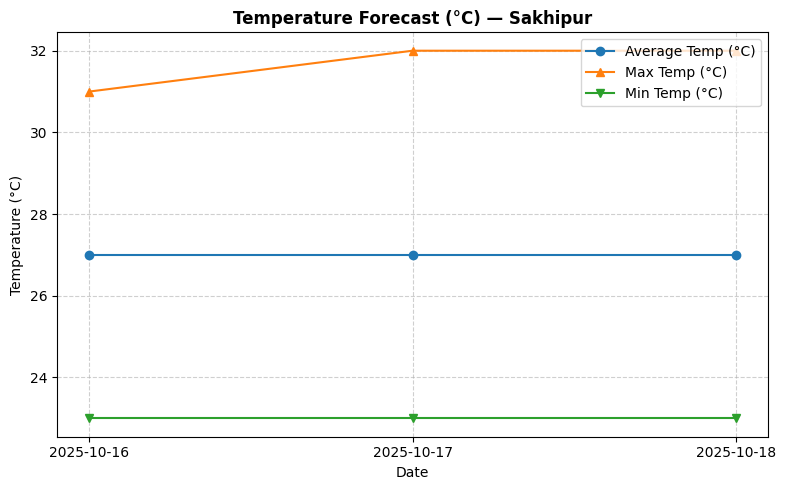

None


In [13]:
weather_data = get_weather_data('bangladesh', 5)
print(create_temperature_visualisation(weather_data))

## 🤖 Natural Language Processing

In [ ]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including location, time period, and weather attribute
    """
    pass

## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [ ]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.